# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [33]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [7]:
y.shape

(20640,)

In [8]:
y_test.shape

(4128,)

In [24]:
#dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
california['target_names'][:5]

['MedHouseVal']

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

*El conjunto de datos contiene los registros del censo estadounidense de 1990 para el estado de California. Cada fila representa los valores obtenidos para cada bloque censal determinado por el Bourou de censos de ese país.*
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

*La variable objetivo a predecir es **MedHouseVal** el valor medio de vivienda para cada bloque, expresado en cientos de miles de dólares ($100,000).
Representa el promedio del valor monetario asociado a cada unidad habitacional en dicho bloque.*

3. ¿Qué información (atributos) hay disponibles para hacer la predicción?

*Existen 8 atributos disponibles para realizar la predicción.*


*  **MedInc**        : ingreso medio del bloque
*  **HouseAge**      : antigüedad media de las viviendas en el bloque
*  **AveRooms**      : nro promedio de habitaciones por vivienda
*  **AveBedrms**     : nro promedio de dormitorios por vivienda
*  **Population**    : población del bloque
*  **AveOccup**      : nro promedio de habitantes por vivienda
*  **Latitude**      : latitud geográfica del bloque
*  **Longitude**     : longitud geográfica del bloque



4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

*A priori se determinan los siguientres atributos como los más relevantes para realizar la predicción:*

* **MedInc** : Porque suele ser un determinante de la case económica.
* **HouseAge** : Porque la edad de un inmueble afecta su valor de mercado.
* **AveRooms** : Porque es un indicativo del tamaño del inmueble.

5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

*Se observan algunos problemas con el dataset después de realizar esta inspección preliminar.*
* No existe una medida de superficie promedio de las viviendas
* No existe una medida de superficie total del bloque censado
* Hoteles y Edificios de departamentos podrían confundir la predicción, ya que agregan valores atípicos en cantidad de habitantes por vivienda.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [28]:
np.array(california['feature_names']) == 'HouseAge'

array([False,  True, False, False, False, False, False, False])

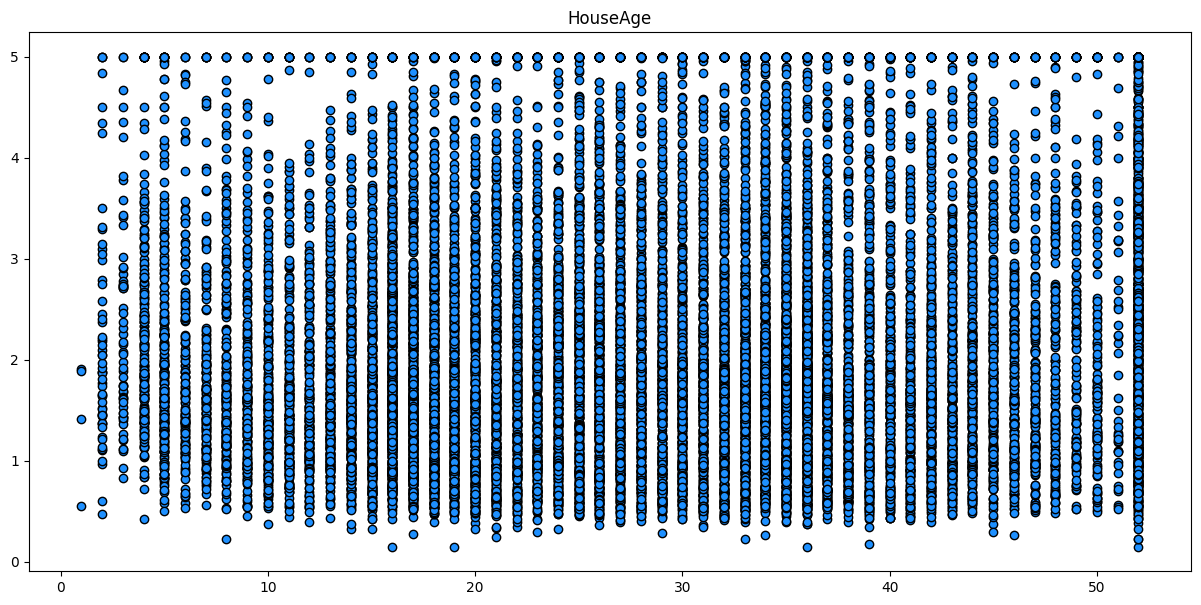

In [54]:
feature = 'HouseAge'
selector = (np.array(california['feature_names']) == feature)
house_age_array=X[:, selector]
house_age_array.flatten()
plt.scatter(house_age_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

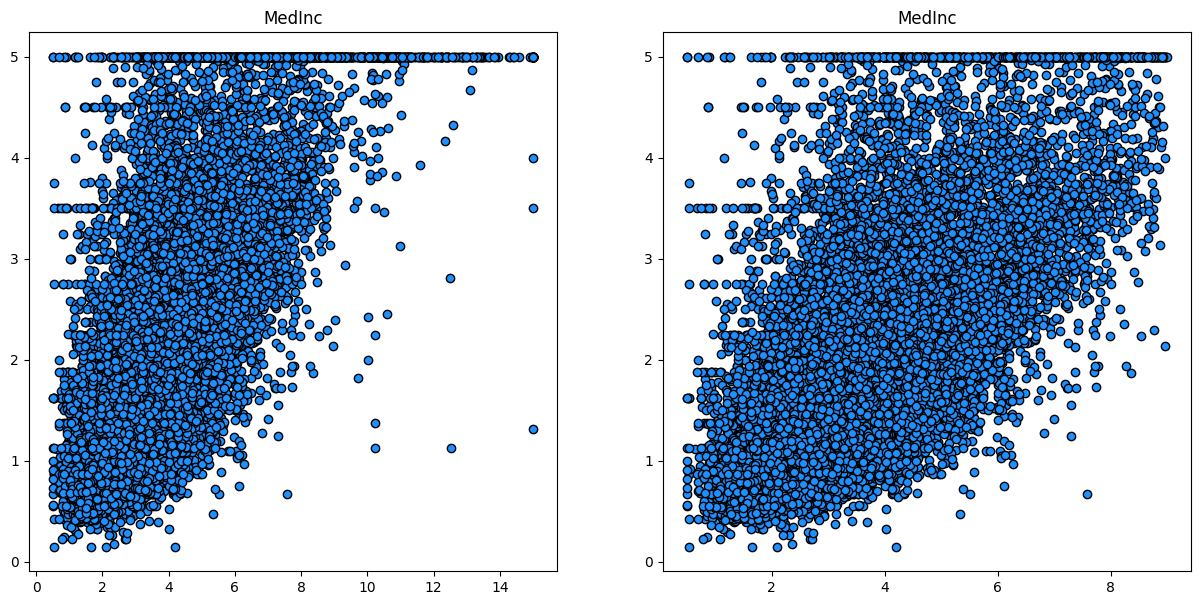

In [56]:
feature = 'MedInc'
selector = (np.array(california['feature_names']) == feature)
med_inc_array=X[:, selector]
med_inc_array.flatten()
outliers_indexes = np.where(med_inc_array>9)
#print(outliers_indexes[0])
filtered_med_inc = np.delete(med_inc_array, outliers_indexes)
filtered_y = np.delete(y, outliers_indexes)
#
#
plt.rcParams["figure.figsize"] = [15,7]
plt.subplot(1,2,1)
plt.scatter(med_inc_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)

plt.subplot(1,2,2)
plt.scatter(filtered_med_inc, filtered_y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)


plt.show()

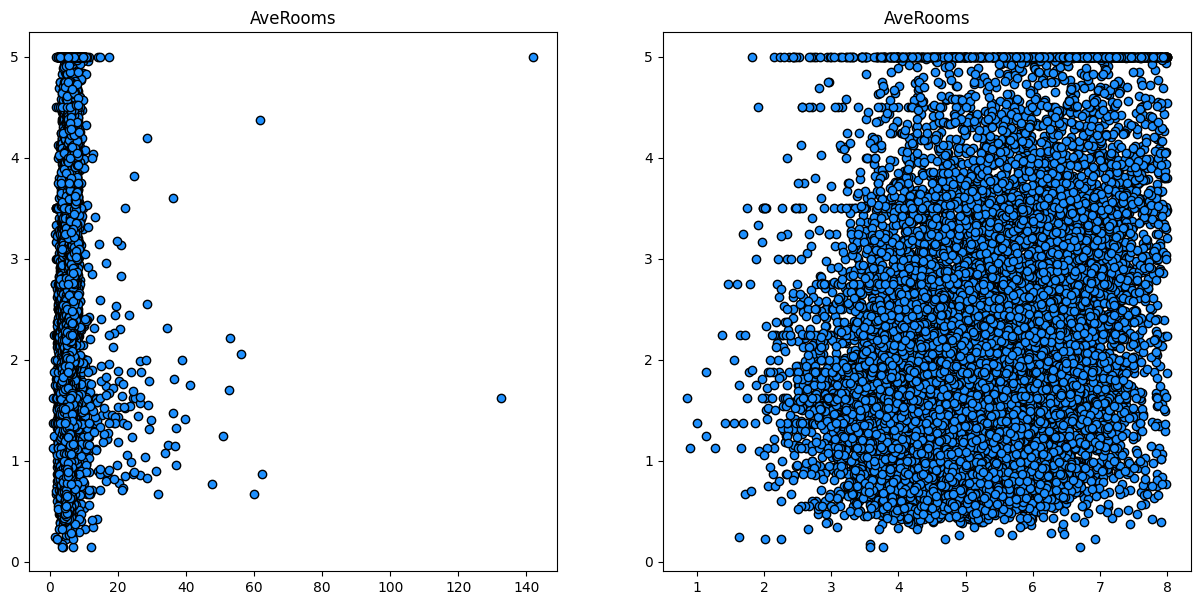

In [50]:
feature = 'AveRooms'
selector = (np.array(california['feature_names']) == feature)
ave_rooms_array=X[:, selector]
ave_rooms_array.flatten()
outliers_indexes = np.where(ave_rooms_array>8)
#print(outliers_indexes[0])
filtered_ave_rooms = np.delete(ave_rooms_array, outliers_indexes)
filtered_y = np.delete(y, outliers_indexes)
#
#
plt.rcParams["figure.figsize"] = [15,7]
plt.subplot(1,2,1)
plt.scatter(ave_rooms_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)

plt.subplot(1,2,2)
plt.scatter(filtered_ave_rooms, filtered_y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)


plt.show()

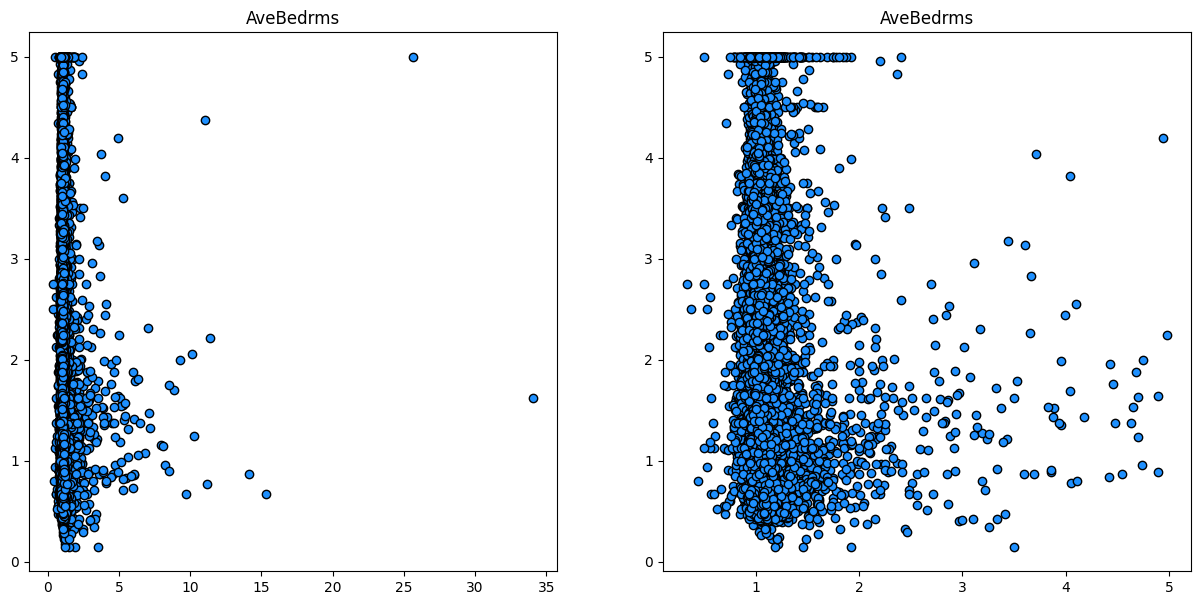

In [51]:
feature = 'AveBedrms'
selector = (np.array(california['feature_names']) == feature)
ave_bedrooms_array=X[:, selector]
ave_bedrooms_array.flatten()
outliers_indexes = np.where(ave_bedrooms_array>5)
#print(outliers_indexes[0])
filtered_ave_bedrooms = np.delete(ave_bedrooms_array, outliers_indexes)
filtered_y = np.delete(y, outliers_indexes)
#
#
plt.rcParams["figure.figsize"] = [15,7]
plt.subplot(1,2,1)
plt.scatter(ave_bedrooms_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)

plt.subplot(1,2,2)
plt.scatter(filtered_ave_bedrooms, filtered_y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)


plt.show()

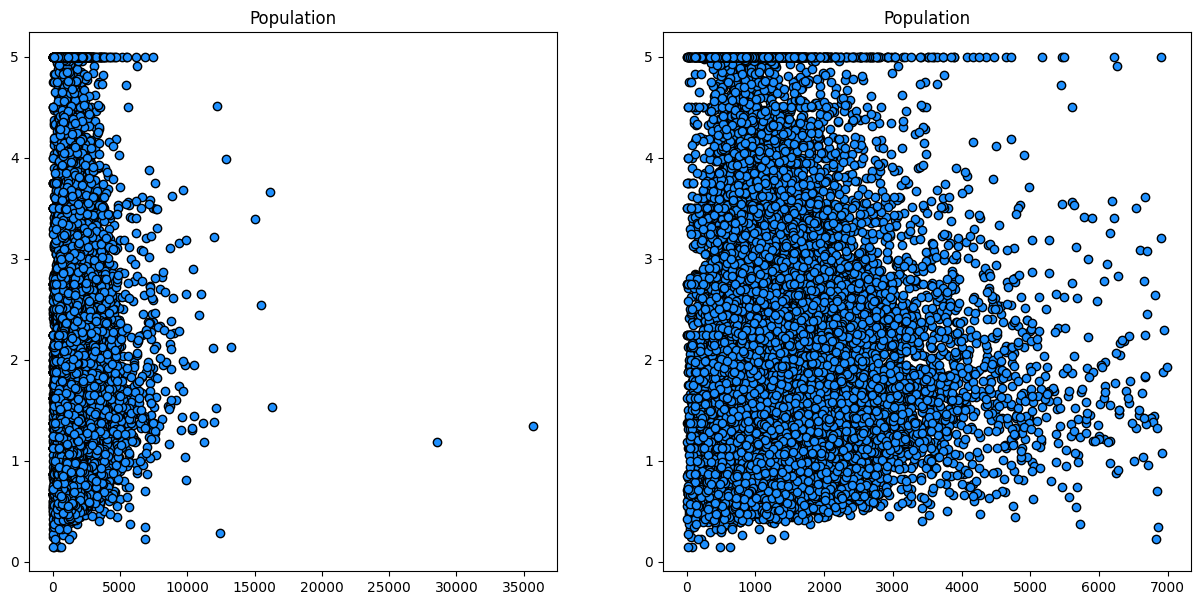

In [52]:
feature = 'Population'
selector = (np.array(california['feature_names']) == feature)
pop_array=X[:, selector]
pop_array.flatten()
outliers_indexes = np.where(pop_array>7000)
#print(outliers_indexes[0])
filtered_pop = np.delete(pop_array, outliers_indexes)
filtered_y = np.delete(y, outliers_indexes)
#
#
plt.rcParams["figure.figsize"] = [15,7]
plt.subplot(1,2,1)
plt.scatter(pop_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)

plt.subplot(1,2,2)
plt.scatter(filtered_pop, filtered_y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)


plt.show()

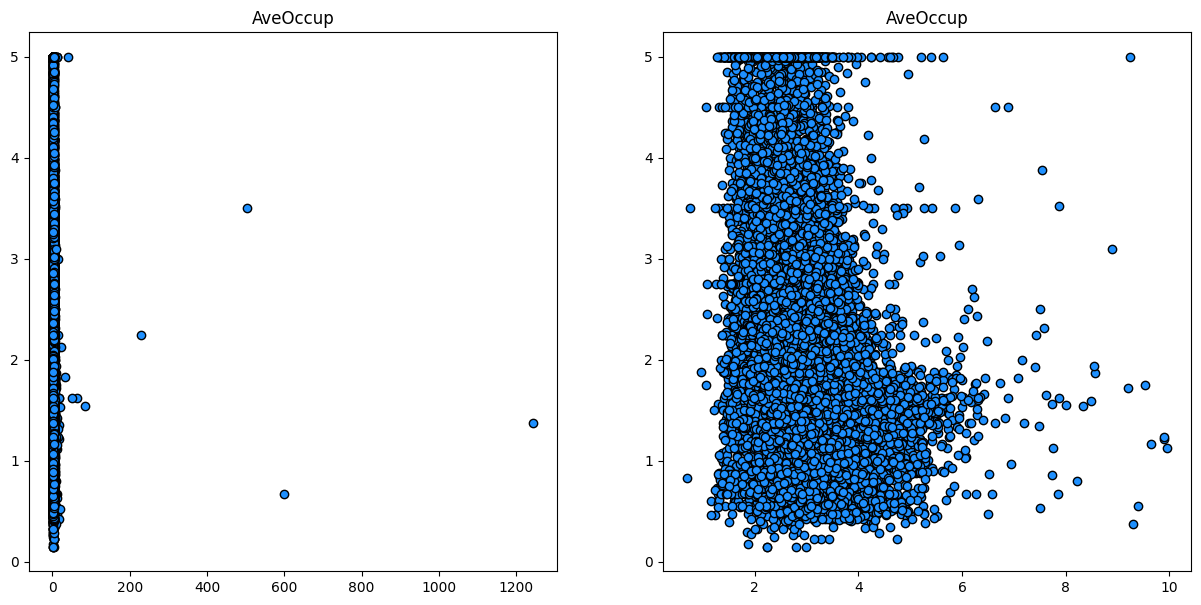

In [53]:
feature = 'AveOccup'
selector = (np.array(california['feature_names']) == feature)
ave_occ_array=X[:, selector]
ave_occ_array.flatten()
outliers_indexes = np.where(ave_occ_array>10)
#print(outliers_indexes[0])
filtered_occ = np.delete(ave_occ_array, outliers_indexes)
filtered_y = np.delete(y, outliers_indexes)
#
#
plt.rcParams["figure.figsize"] = [15,7]
plt.subplot(1,2,1)
plt.scatter(ave_occ_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)

plt.subplot(1,2,2)
plt.scatter(filtered_occ, filtered_y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)


plt.show()

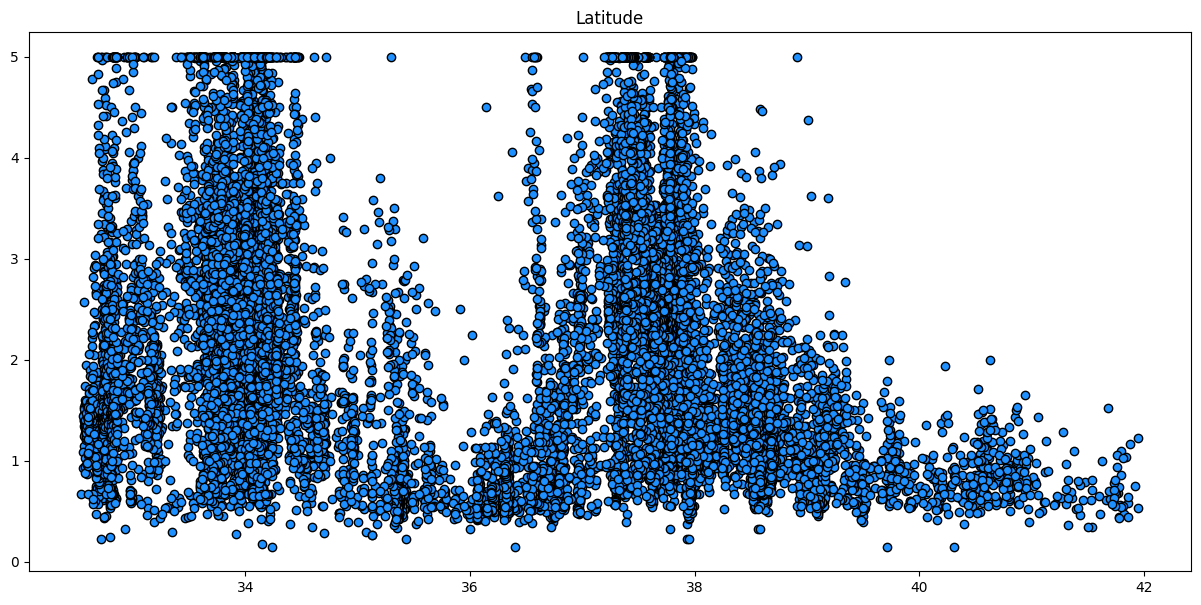

In [57]:
feature = 'Latitude'
selector = (np.array(california['feature_names']) == feature)
latitude_array=X[:, selector]
latitude_array.flatten()
plt.scatter(latitude_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

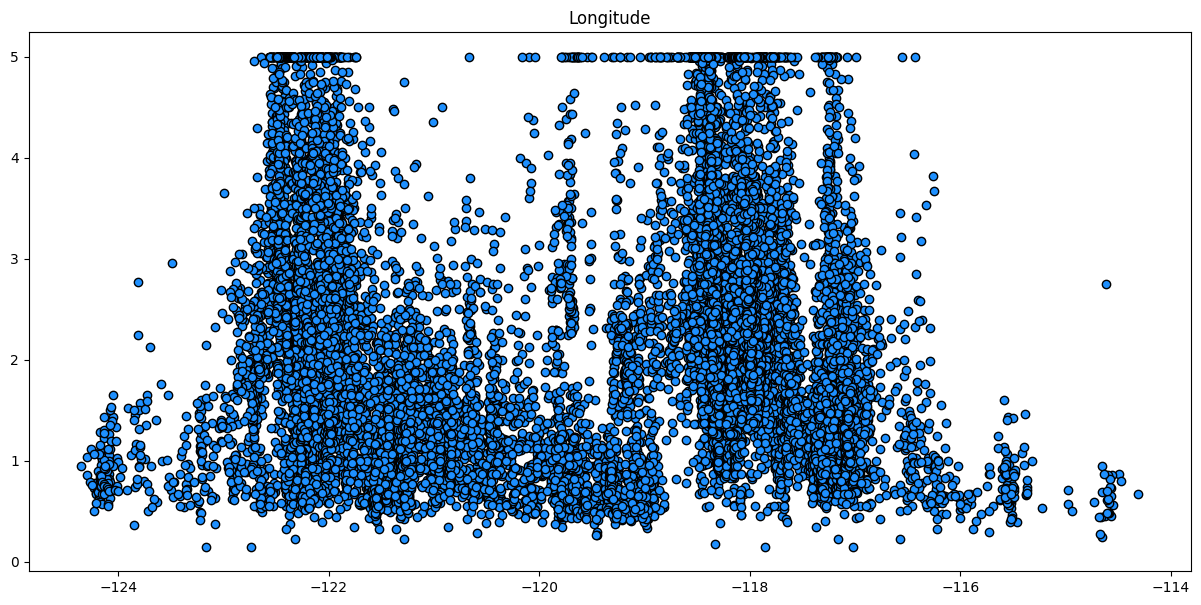

In [58]:
feature = 'Longitude'
selector = (np.array(california['feature_names']) == feature)
longitude_array=X[:, selector]
longitude_array.flatten()
plt.scatter(longitude_array, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

In [ ]:
california['feature_names'][1] == feature

True

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [111]:
# 1. Resolver acá. Ayuda:
feature = 'MedInc'  # selecciono el atributo 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)

X_train_f = X_train[:, selector]
X_train_flat = X_train_f.flatten()

X_test_f = X_test[:, selector]
X_test_flat = X_test_f.flatten()

y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()
X_train_flat.shape, X_test_flat.shape, y_train_flat.shape, y_test_flat.shape

((16512,), (4128,), (16512,), (4128,))

In [98]:
X_train_flat[:5]

array([4.2386, 4.3898, 3.9333, 1.4653, 3.1765])

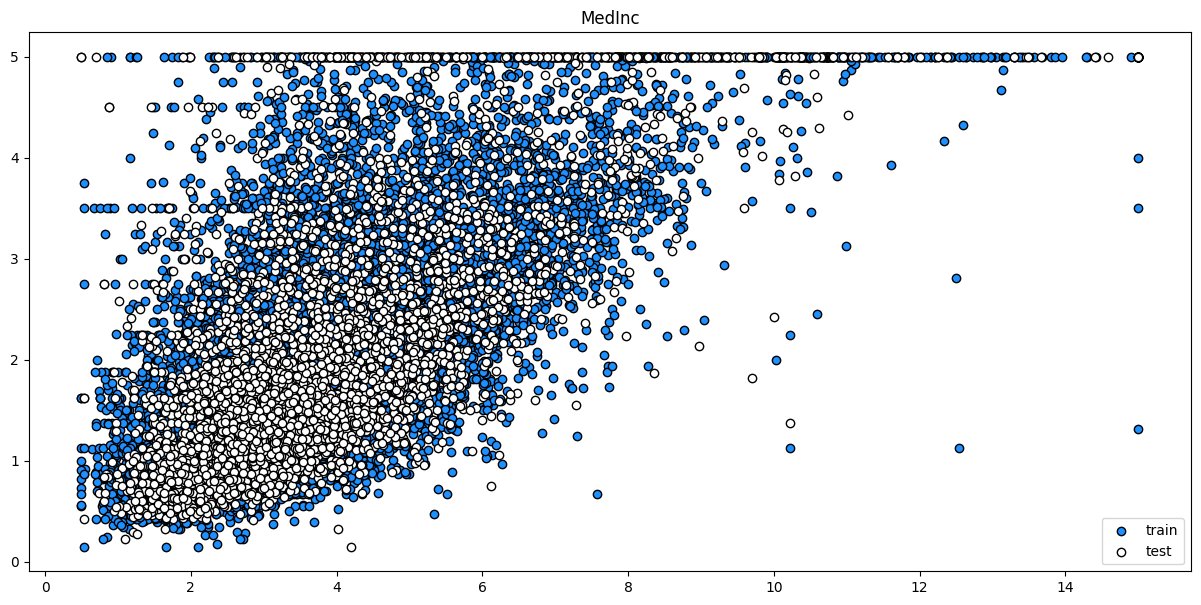

In [99]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [100]:
X_train_f[1]
X_train_f.shape

(16512, 1)

##Entrenamiento

In [101]:
X_train_bias = np.stack((np.ones(X_train_flat.shape[0]), X_train_flat), axis=1) # add bias
X_train_bias.shape

(16512, 2)

In [102]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [103]:
w = linear_least_squares(X_train_flat, y_train_flat)
w

array([0.42032178, 0.44320635])

In [104]:
X_uniques = np.unique(X_train_flat)
X_uniques.shape

(10915,)

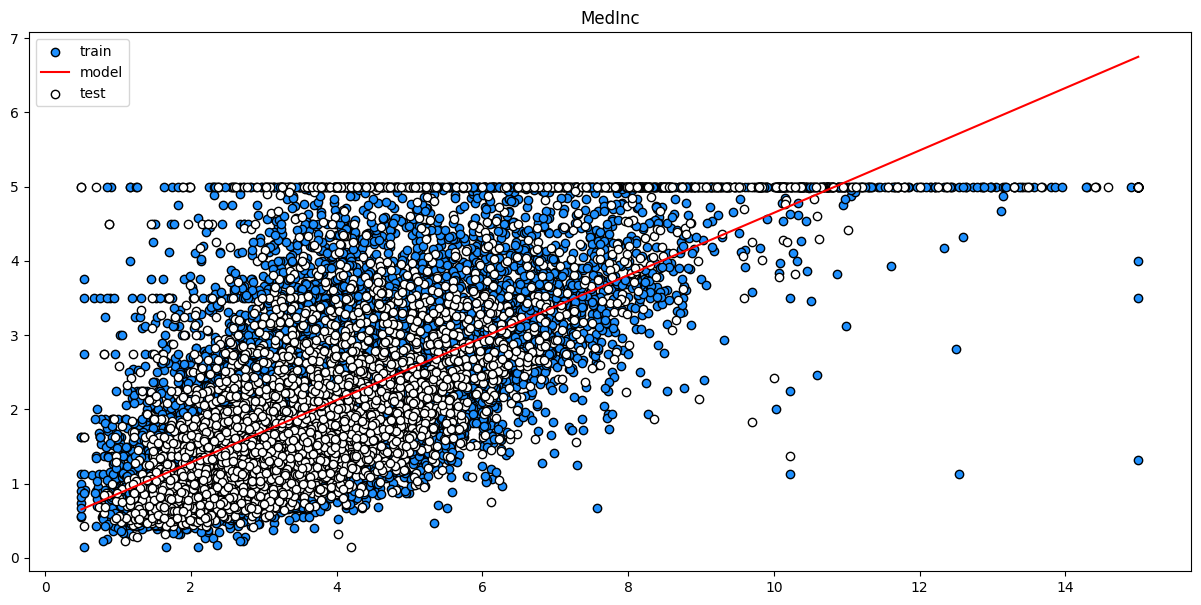

In [114]:
feature = 'MedInc'
#
#
#plt.rcParams["figure.figsize"] = [15,7]

plt.scatter(X_train_flat, y_train_flat, facecolor="dodgerblue", edgecolor="k", label="train")

plt.title(feature)
plt.plot(X_uniques, f(X_uniques, w), color="red", label="model")
plt.scatter(X_test_flat, y_test, color="white", edgecolor="k", label="test")

plt.legend()
plt.show()


plt.show()

##Predicción y Evaluación

In [107]:
y_train_pred = f(X_train_flat, w)

In [110]:
y_test_pred = f(X_test_flat, w)

In [113]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_flat, y_train_pred)
val_error = mean_squared_error(y_test_flat, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {val_error:f}')

Train error: 0.696068
Test error: 0.721498


## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [127]:
# 1. Resolver acá.
X_train_1dim = X_train_flat.reshape(-1,1)
X_test_1dim = X_test_flat.reshape(-1,1)
y_train_1dim = y_train_flat.reshape(-1,1)
y_test_1dim = y_test_flat.reshape(-1,1)
X_train_1dim.shape, X_test_1dim.shape, y_train_1dim.shape, y_test_1dim.shape

((16512, 1), (4128, 1), (16512, 1), (4128, 1))

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)


In [120]:
model.fit(X_train_1dim, y_train_1dim)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [121]:
lr.coef_

array([[ 0.18725681,  0.53878506, -0.0108915 ]])

In [122]:
lr.intercept_

0.0

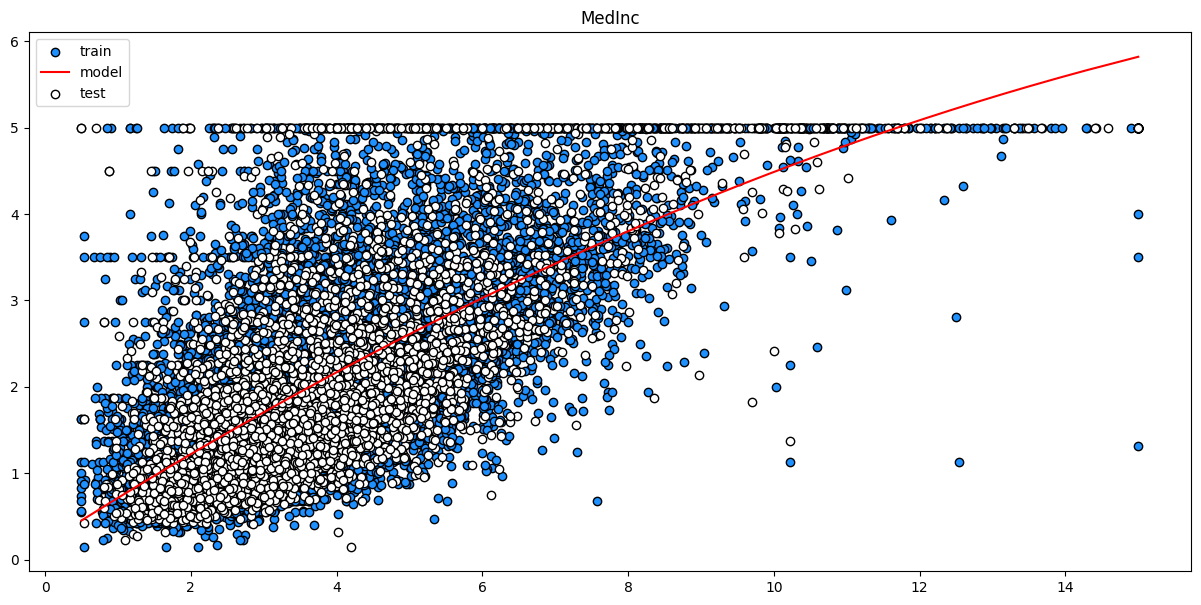

In [123]:
feature = 'MedInc'
#
#
#plt.rcParams["figure.figsize"] = [15,7]

plt.scatter(X_train_flat, y_train_flat, facecolor="dodgerblue", edgecolor="k", label="train")

plt.title(feature)
plt.plot(X_uniques, model.predict(X_uniques.reshape(-1,1)), color="red", label="model")
plt.scatter(X_test_flat, y_test, color="white", edgecolor="k", label="test")

plt.legend()
plt.show()


plt.show()

##Predecir y Evaluar

In [124]:
y_train_pred = model.predict(X_train_1dim)
y_test_pred = model.predict(X_test_1dim)

In [129]:
train_error = mean_squared_error(y_train_1dim, y_train_pred)
test_error = mean_squared_error(y_test_1dim, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')

Train error: 0.69
Test error: 0.72


In [130]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_1dim, y_train_1dim)

    # predict:
    y_train_pred = model.predict(X_train_1dim)
    y_val_pred = model.predict(X_test_1dim)

    # evaluate:
    train_error = mean_squared_error(y_train_1dim, y_train_pred)
    val_error = mean_squared_error(y_test_1dim, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)


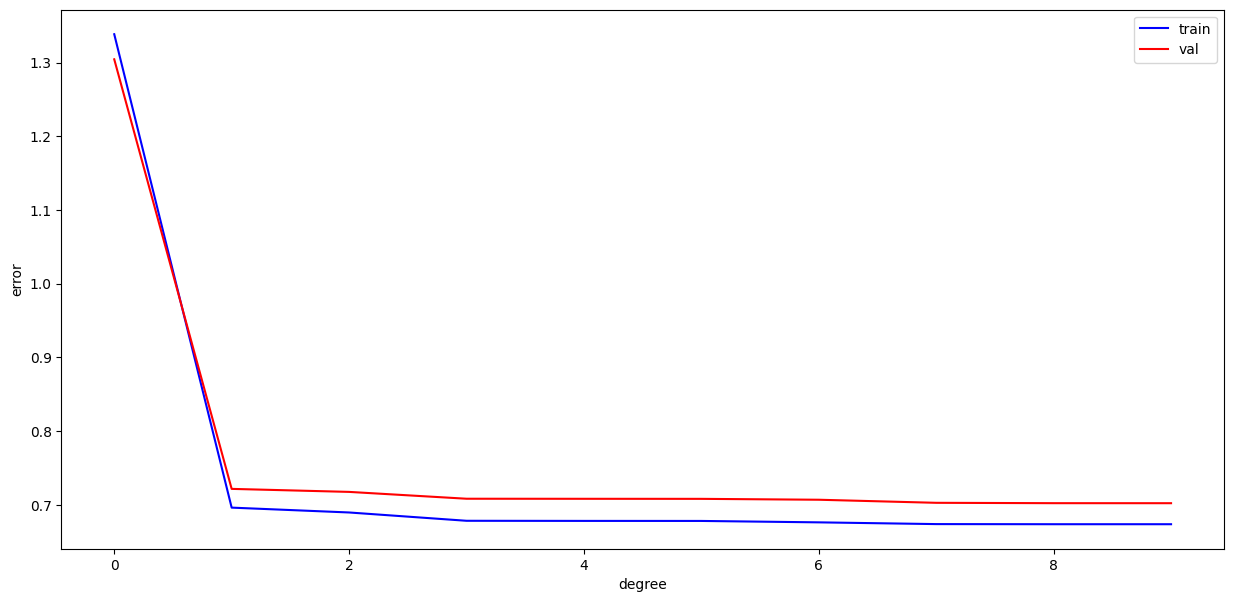

In [131]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.

In [133]:
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_1dim, y_train_1dim);

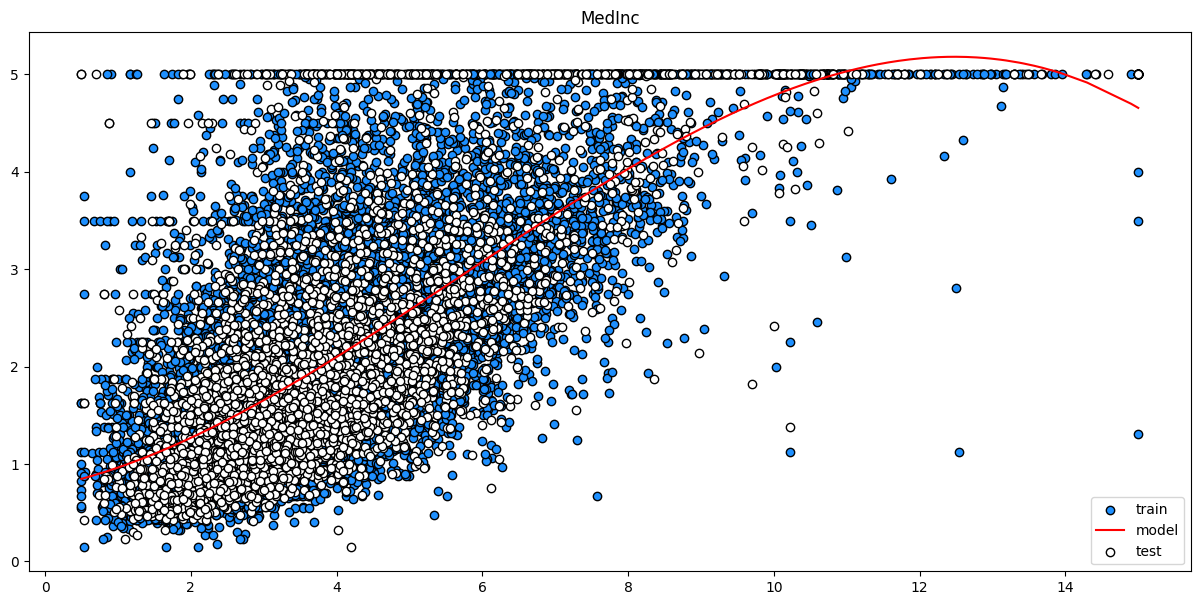

In [134]:
feature = 'MedInc'
#
#
#plt.rcParams["figure.figsize"] = [15,7]

plt.scatter(X_train_flat, y_train_flat, facecolor="dodgerblue", edgecolor="k", label="train")

plt.title(feature)
plt.plot(X_uniques, model.predict(X_uniques.reshape(-1,1)), color="red", label="model")
plt.scatter(X_test_flat, y_test, color="white", edgecolor="k", label="test")

plt.legend()
plt.show()


plt.show()

In [135]:
train_errors[3], val_errors[3]


(0.6782140838210796, 0.7081355393674343)

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 2), (4128, 2))

In [ ]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
